In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
raisin = fetch_ucirepo(id=850) 
  
# data (as pandas dataframes) 
X = raisin.data.features 
y = raisin.data.targets 
  
X.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forest_clf = RandomForestClassifier(random_state=42)
random_forest_clf.fit(X_train, y_train.to_numpy().ravel())

RandomForestClassifier(random_state=42)

In [5]:
from sklearn.model_selection import cross_val_score

cross_val_score(random_forest_clf, X_train, y_train.to_numpy().ravel(), cv=5, scoring="accuracy")

array([0.81944444, 0.84027778, 0.89583333, 0.8125    , 0.88888889])

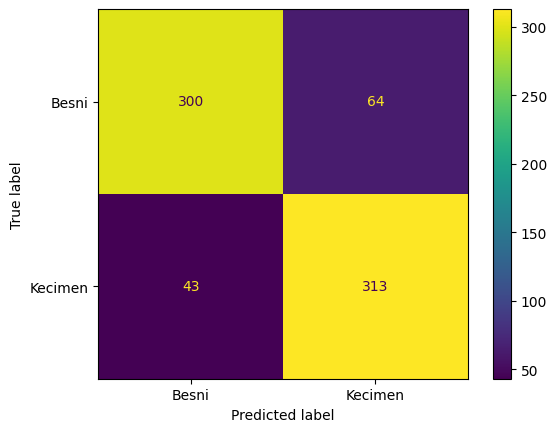

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = cross_val_predict(random_forest_clf, X_train, y_train.to_numpy().ravel(), cv=5)
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_forest_clf.classes_)
disp.plot()

In [7]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print("Precisão:", precision_score(y_train, y_train_pred, pos_label="Besni"))
print("Revocação:", recall_score(y_train, y_train_pred, pos_label="Besni"))
print("Acurácia:", accuracy_score(y_train, y_train_pred))
print("F1:", f1_score(y_train, y_train_pred, pos_label="Besni"))

Precisão: 0.8746355685131195
Revocação: 0.8241758241758241
Acurácia: 0.8513888888888889
F1: 0.8486562942008486


In [8]:
# Métricas no conjunto de testes

y_test_pred = random_forest_clf.predict(X_test)

print("Precisão:", precision_score(y_test, y_test_pred, pos_label="Besni"))
print("Revocação:", recall_score(y_test, y_test_pred, pos_label="Besni"))
print("Acurácia:", accuracy_score(y_test, y_test_pred))
print("F1:", f1_score(y_test, y_test_pred, pos_label="Besni"))

Precisão: 0.8674698795180723
Revocação: 0.8372093023255814
Acurácia: 0.8611111111111112
F1: 0.8520710059171598
